In [122]:
import pandas as pd

columns = ["uuid", "extract_time", "load_time"]
number_of_rounds = 18
dataset = pd.DataFrame({})

for u in range(1, number_of_rounds):
    df = pd.read_csv("rounds/round_{0}.csv".format(u), names=columns, sep=";")
    dataset = dataset.append(df)

In [123]:
def filter_errors(same_uuid):
    if (same_uuid.shape[0] < 2):
        return None
    else:
        return same_uuid
    
    
def non_events(same_uuid):
    if (same_uuid.shape[0] == 1):
        return same_uuid
    else:
        return None

df_without_errors = df.groupby("uuid").apply(filter_errors).dropna()
df_non_events = df.groupby("uuid").apply(non_events).dropna()

In [118]:
import datetime as dt

def processing_time(same_uuid):
    dt1 = (pd.to_datetime(same_uuid.iloc[0].load_time))
    dt2 = (pd.to_datetime(same_uuid.iloc[1].load_time))
    delta = dt2 - dt1
    return same_uuid[['uuid']].assign(processing_time=delta.microseconds)

df = (df_without_errors
      .groupby("uuid")
      .apply(processing_time))

In [119]:
df = df['processing_time'].reset_index()['processing_time']

/home/dguedes/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


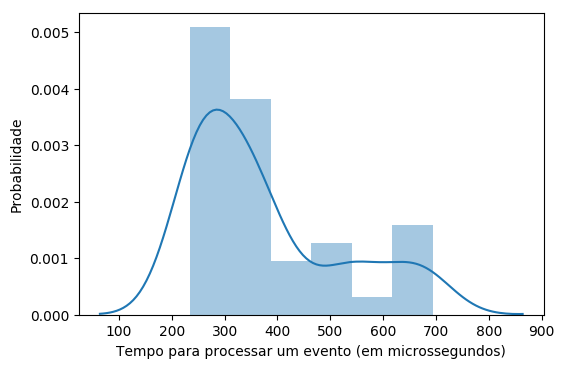

In [120]:
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['figure.dpi']= 100

fig = sns.distplot(df, norm_hist=False)
fig.set_xlabel("Tempo para processar um evento (em microssegundos)")
fig.set_ylabel("Probabilidade")
fig.figize=(300, 300)
fig.get_figure().savefig("output.png")